<a href="https://colab.research.google.com/github/derivai7/test/blob/main/Kompresi_gambar_dengan_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

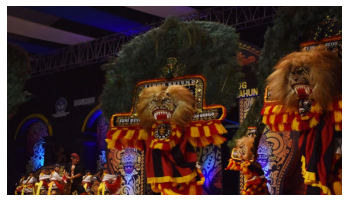

In [2]:
img = plt.imread("/content/hero1.webp")
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
type(img)

numpy.ndarray

In [4]:
print(img.shape)
print(img.size)

(540, 960, 3)
1555200


In [5]:
w, h, d = img.shape
image_array = img.reshape(w*h, d)
print(image_array.shape)

image_array = image_array/255

(518400, 3)


In [7]:
from sklearn.utils import shuffle

image_array_sample = shuffle(image_array, random_state = 1)[:1000]
image_array_sample.size

3000

In [10]:
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(image_array_sample)

KMeans(n_clusters=6, random_state=1)

In [11]:
labels = kmeans.predict(image_array)
labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [12]:
print(kmeans.cluster_centers_)
c = kmeans.cluster_centers_

[[0.16724916 0.11395521 0.08935926]
 [0.07593498 0.04384519 0.06808253]
 [0.63562787 0.43220693 0.19674593]
 [0.40953123 0.13992988 0.04682509]
 [0.22531194 0.16944232 0.29411765]
 [0.68976035 0.61503268 0.6379085 ]]


In [13]:
def recreate_image(c, labels, w, h, d):
  image = np.zeros((w, h ,d))
  label_idx = 0

  for i in range(w):
    for j in range(h):
      image[i][j] = c[labels[label_idx]]
      label_idx += 1
  return(image)

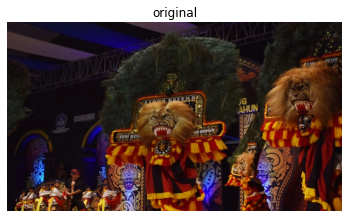

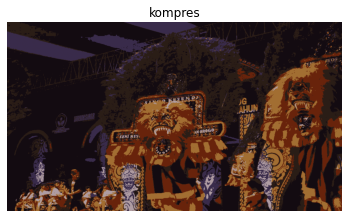

In [15]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()

plt.figure(2)
plt.axis('off')
plt.title("kompres")
plt.imshow(recreate_image(c, labels, w, h, d))
plt.show()